# LB5

In [53]:
import random
import math
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

## DOWNLOAD THE DATA

In [54]:
data = pd.read_csv('data/iris.data', header=None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
no_labeled_data = data.drop(columns=4)
no_labeled_data.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## K-means

In [56]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=15)
k_means.fit(no_labeled_data)

KMeans(n_clusters=3, n_init=15)

In [57]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels = pairwise_distances_argmin(no_labeled_data, k_means_cluster_centers)

print(k_means_cluster_centers)
print(k_means_labels)

[[5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


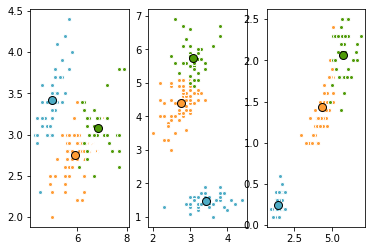

In [58]:
f, ax = plt.subplots(1, 3)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

for i in range(3):
    my_members = k_means_labels == i
    cluster_center = k_means_cluster_centers[i]

    for j in range(3):
        ax[j].plot(no_labeled_data[my_members][j],
                   no_labeled_data[my_members][j+1],
                   'w',
                   markerfacecolor=colors[i],
                   marker='o',
                   markersize=4)

        ax[j].plot(cluster_center[j],
                   cluster_center[j+1],
                   'o',
                   markerfacecolor=colors[i],
                   markeredgecolor='k',
                   markersize=8)

plt.show()

In [59]:
reduced_data = PCA(n_components=2).fit_transform(no_labeled_data)

kmeans = KMeans(init='k-means++', n_clusters=3, n_init=15)
kmeans.fit(reduced_data)

KMeans(n_clusters=3, n_init=15)

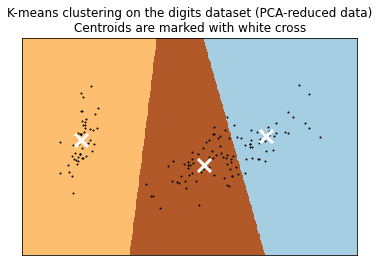

In [60]:
h = .02

x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [61]:
k_means = KMeans(init='k-means++', n_clusters=10)
k_means.fit(no_labeled_data)

print(k_means.inertia_)

25.935348994143123


In [62]:
for i in range(3):
    k_means = KMeans(init='random', n_clusters=10)
    k_means.fit(no_labeled_data)

    print(k_means.inertia_)

25.999856060606064
27.152116790072682
26.437340909090917


In [63]:
# 4 ВРУЧНУЮ ВЫБРАТЬ ТОЧКИ

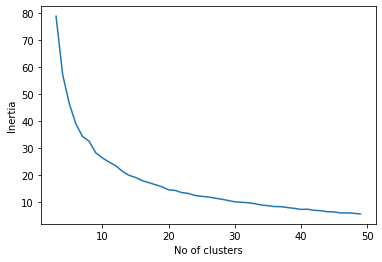

In [64]:
inertia_values = []
range_of_n = range(3, 50)

for n in range_of_n:
    k_means = KMeans(init='k-means++', n_clusters=n)
    k_means.fit(no_labeled_data)
    inertia_values.append(k_means.inertia_)

plt.xlabel("No of clusters")
plt.ylabel("Inertia")
plt.plot(range_of_n, inertia_values)

plt.show()

In [65]:
mb_k_means = MiniBatchKMeans(init='k-means++', n_clusters=3, n_init=15)
mb_k_means.fit(no_labeled_data)

mb_k_means_cluster_centers = mb_k_means.cluster_centers_
mb_k_means_labels = pairwise_distances_argmin(no_labeled_data, mb_k_means_cluster_centers)

print(mb_k_means_cluster_centers)
print(mb_k_means_labels)

[[5.01228814 3.41271186 1.46031073 0.24449153]
 [5.88240093 2.74044289 4.36573427 1.41433566]
 [6.84452055 3.09863014 5.71678082 2.07773973]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [66]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=15)
k_means.fit(no_labeled_data)

k_means_cluster_centers = k_means.cluster_centers_
k_means_labels = pairwise_distances_argmin(no_labeled_data, k_means_cluster_centers)

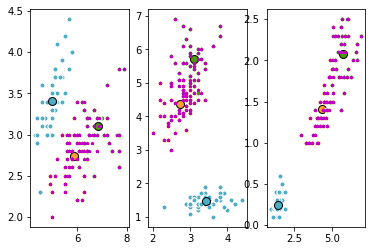

In [67]:
f, ax = plt.subplots(1, 3)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

for i in range(3):
    my_members = mb_k_means_labels == i
    other_members = k_means_labels == i
    
    diff_members = my_members != other_members

    cluster_center = mb_k_means_cluster_centers[i]

    for j in range(3):
        ax[j].plot(no_labeled_data[my_members][j],
                   no_labeled_data[my_members][j+1],
                   'w',
                   markerfacecolor=colors[i],
                   marker='o',
                   markersize=5)

        ax[j].plot(cluster_center[j],
                   cluster_center[j+1],
                   'o',
                   markerfacecolor=colors[i],
                   markeredgecolor='k',
                   markersize=8)

        ax[j].plot(no_labeled_data[diff_members][j],
                   no_labeled_data[diff_members][j+1],
                   'o',
                   c='m',
                   markerfacecolor='m',
                   marker='*',
                   markersize=3)

plt.show()

## AgglomerativeClustering

In [68]:
hier = AgglomerativeClustering(n_clusters=3, linkage='average')
hier = hier.fit(no_labeled_data)
hier_labels = hier.labels_

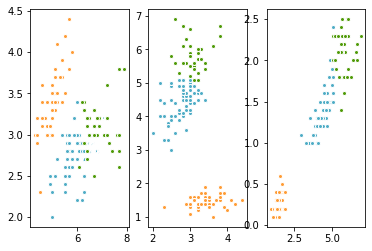

In [69]:
f, ax = plt.subplots(1, 3)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

for i in range(3):
    my_members = hier_labels == i

    for j in range(3):
        ax[j].plot(no_labeled_data[my_members][j],
                   no_labeled_data[my_members][j+1],
                   'w',
                   markerfacecolor=colors[i],
                   marker='o',
                   markersize=4)
plt.show()

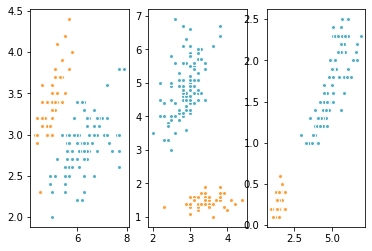

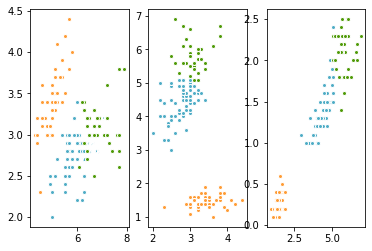

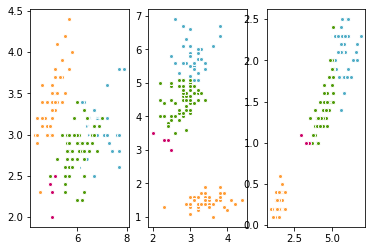

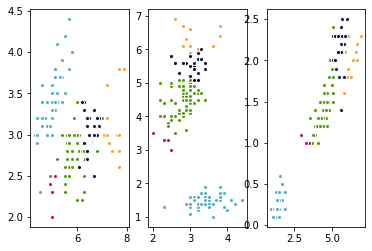

In [70]:
for n in range(2,6):
    hier = AgglomerativeClustering(n_clusters=n, linkage='average')
    hier = hier.fit(no_labeled_data)

    hier_labels = hier.labels_

    f, ax = plt.subplots(1, 3)
    colors = ['#4EACC5', '#FF9C34', '#4E9A06', '#CC0066', '#000033']

    for i in range(n):
        my_members = hier_labels == i
        for j in range(3):
            ax[j].plot(no_labeled_data[my_members][j],
                    no_labeled_data[my_members][j + 1], 'w',
                    markerfacecolor=colors[i], marker='o', markersize=4)

    plt.show()


In [71]:
hier = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
hier = hier.fit(no_labeled_data)

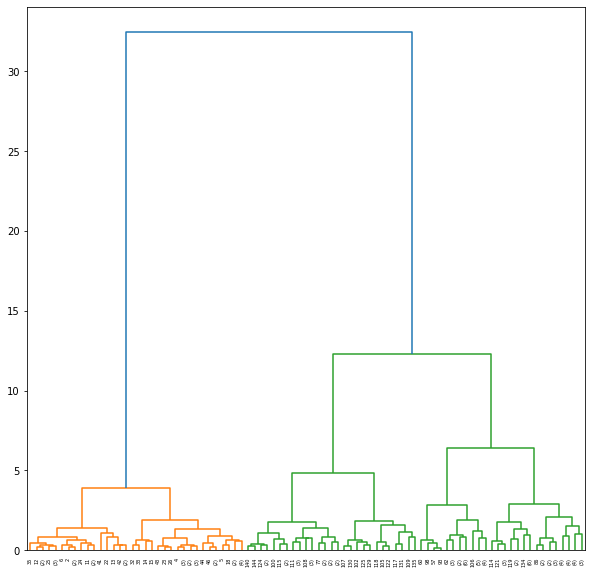

In [72]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.figure(figsize=(10,10))
plot_dendrogram(hier, truncate_mode='level', p=6)
plt.show()

In [33]:
data1 = np.zeros([250,2])

for i in range(250):
    r = random.uniform(1, 3)
    a = random.uniform(0, 2*math.pi)
    data1[i,0] = r*math.sin(a)
    data1[i,1] = r*math.cos(a)
    data2 = np.zeros([500,2])

    for i in range(500):
        r = random.uniform(5, 9)
        a = random.uniform(0, 2*math.pi)
        data2[i,0] = r*math.sin(a)
        data2[i,1] = r*math.cos(a)
        data = np.vstack((data1, data2))

In [34]:
hier = AgglomerativeClustering(n_clusters=2, linkage='ward')
hier = hier.fit(data)
hier_labels = hier.labels_

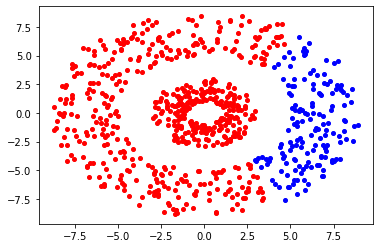

In [35]:
my_members = hier_labels == 0
plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o',markersize=4,color='red',linestyle='None')

my_members = hier_labels == 1
plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o',markersize=4,color='blue',linestyle='None')

plt.show()

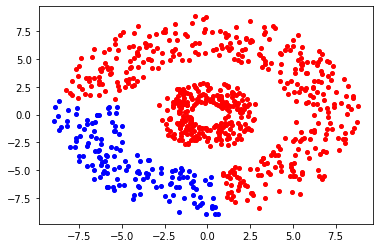

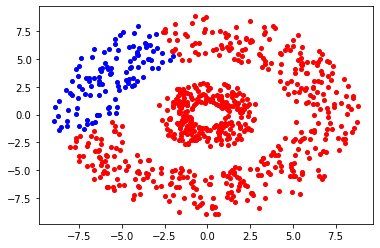

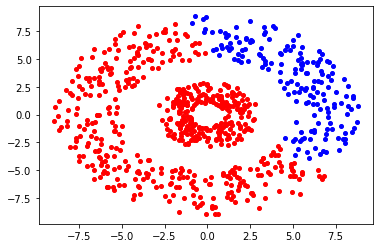

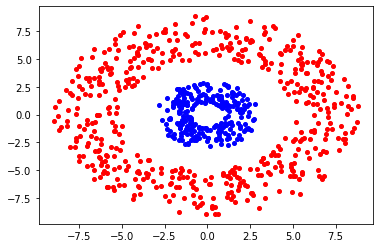

In [24]:
for linkage in ['ward', 'complete', 'average', 'single']:
    hier = AgglomerativeClustering(n_clusters=2, linkage=linkage)
    hier = hier.fit(data)
    hier_labels = hier.labels_

    my_members = hier_labels == 0
    plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o',markersize=4,color='red',linestyle='None')

    my_members = hier_labels == 1
    plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o',markersize=4,color='blue',linestyle='None')

    plt.show()